In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [3]:
x_train,y_train=load_data('train_data.pkl')
x_test1,y_test1,test1_star=load_data('test1_data.pkl')
x_test2,y_test2,test2_lab=load_data('test2_data.pkl')

### AF make bin

In [5]:
af_cut_off=0.005
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1
x_test1.loc[x_test1['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_test1.loc[x_test1['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1
x_test2.loc[x_test2['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_test2.loc[x_test2['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1

In [6]:
x_train = x_train.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_test1 = x_test1.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_test2 = x_test2.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
def test_test2_auc(rfc,x_train, y_train,x_test,y_test,x_test2,y_test2):
    x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)
    rfc.fit(x_tra, y_tra)
    y_val_pred_prob=rfc.predict_proba(x_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
    val_auc= auc(fpr, tpr)
#     print('val auc ',val_auc)
    rfc.fit(x_train, y_train)
    y_test_pred_prob=rfc.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
    test1_auc=auc(fpr, tpr)
#     print('test1 auc ',test1_auc)
    y_test2_pred_prob=rfc.predict_proba(x_test2)[:,1]
    fpr2, tpr2, _ = roc_curve(y_test2, y_test2_pred_prob)
    test2_auc=auc(fpr2, tpr2)
#     print('test2 auc ',test2_auc)
    return val_auc,test1_auc,test2_auc
    
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123)
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9950212542418693, 0.9965753008975928, 0.9505702781267058)

In [8]:
#loss loss{‘deviance’, ‘exponential’}, default=’deviance’
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123,loss='exponential')
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.995566880126386, 0.9970648686477175, 0.9185427796088018)

In [9]:
loss='exponential'
#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.2,0.3,0.4]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.9535452633569944, 0.9858989244752708, 0.9120579930541137)
0.001 (0.9582444779151489, 0.9858998623011016, 0.9120579930541137)
0.01 (0.9915082514416477, 0.9974305328890702, 0.8690822149889466)
0.2 (0.9959862544447089, 0.9959782883403601, 0.9347825499755253)
0.3 (0.9960279851609192, 0.9963583882995602, 0.9555505229144724)
0.4 (0.9961900502086408, 0.9949927523913142, 0.9410182751127192)


In [10]:

#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.5,0.6,0.7,0.8,0.9]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#0.3 (0.9960279851609192, 0.9963583882995602, 0.9555505229144724)

0.5 (0.9961419371475984, 0.9949769283512399, 0.9277814079865009)
0.6 (0.9963879804167955, 0.9952676628586972, 0.9487529489247641)
0.7 (0.9959979338773574, 0.995090164445351, 0.9396051312230416)
0.8 (0.9967386217907721, 0.9939650652794777, 0.924933922241399)
0.9 (0.9961935385347636, 0.9956634310258852, 0.9587451473687276)


In [31]:
learning_rate=0.3
#n_estimatorsint, default=100
from sklearn.ensemble import GradientBoostingClassifier
for para in [10,20,40,60,80,100,120,140,160,180,200,300]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,learning_rate=learning_rate,
                                    n_estimators=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)
    
#100 (0.9966599406571128, 0.9950980240491409, 0.9314274287349055)

10 (0.9935331343178682, 0.9968497523686478, 0.868249989312937)
20 (0.9949303252076006, 0.997498733510132, 0.9052670691187563)
40 (0.9957364127759556, 0.9970036748039349, 0.9477176250104521)
60 (0.9957466451992494, 0.9968488003762637, 0.9555287671075218)
80 (0.9958421736561094, 0.9963208157668073, 0.9493082358031174)
100 (0.9960279851609192, 0.9963583882995602, 0.9555505229144724)
120 (0.9962259928874323, 0.9962069195113107, 0.9498160034189205)
140 (0.9963786265348957, 0.9960911079378033, 0.9480697108902816)
160 (0.9963953188213799, 0.995985006119951, 0.9514330382686111)
180 (0.9964420107125204, 0.9959618381386282, 0.9538798912691155)
200 (0.9965314152190758, 0.9959175449929734, 0.953695289870731)
300 (0.9963673088545861, 0.9950693084455324, 0.944787343886671)


In [32]:
n_estimators=100
#subsamplefloat, default=1.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.2,0.5,0.6,0.7,0.8,0.9]:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,
                                    subsample=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#0.8 (0.9963594019820411, 0.9966683949861734, 0.9593330826375389)

0.2 (0.9952777883288876, 0.9968958814996147, 0.9593271519047399)
0.5 (0.9961455288315323, 0.9963387307901537, 0.9544349873070574)
0.6 (0.9957237514441024, 0.996171205630355, 0.9582300103770206)
0.7 (0.9962946999923257, 0.9962583780996418, 0.9530137547199238)
0.8 (0.9963594019820411, 0.9966683949861734, 0.9593330826375389)
0.9 (0.9963358364011223, 0.9970207370007707, 0.9575360999595066)


In [49]:
subsample=0.8
#criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
from sklearn.ensemble import GradientBoostingClassifier
for para in ['squared_error']:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss=loss,learning_rate=learning_rate,
                                     n_estimators=n_estimators,subsample=subsample,
                                    criterion=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

squared_error (0.9963594019820411, 0.9966610227118183, 0.9592629120861054)


In [50]:
criterion='friedman_mse'
#
#min_samples_splitint or float, default=2
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,
            min_samples_split=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9963594019820411, 0.9966683949861734, 0.9593330826375389)
4 (0.9964225536045906, 0.9966684686522508, 0.9592553665498214)
6 (0.9964226569624017, 0.9966690126478989, 0.9592552784696314)
8 (0.9964226569624017, 0.9966681739879415, 0.9592414498797881)
10 (0.9964223985678742, 0.9967426730586156, 0.9582656828540048)
20 (0.9962568451940299, 0.996694693775783, 0.96007421871697)


In [51]:
criterion='friedman_mse'
#
#min_samples_splitint or float, default=2
from sklearn.ensemble import GradientBoostingClassifier
for para in [12,14,16,18]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,
            min_samples_split=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#12 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)

12 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
14 (0.9963783681403682, 0.9967648805476222, 0.9623376153615609)
16 (0.9962568451940298, 0.996075085565982, 0.9515129416810492)
18 (0.9962567935151243, 0.9966875283331067, 0.9546880563732006)


In [65]:
min_samples_split=12
#max_depthint, default=3
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,5,6,8,10,20,40]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,
            max_depth=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9954655377926545, 0.9972498753343306, 0.9676402923651621)
4 (0.9966237395837936, 0.9963519906840745, 0.9613227847714754)
5 (0.9968199643880662, 0.9963729571830092, 0.9578490048347804)
6 (0.99641309636488, 0.996152885443583, 0.9536583989511176)
8 (0.9958227165481799, 0.9961363559091527, 0.9542561111210283)
10 (0.994640096474181, 0.9958823127748312, 0.9395684751839349)
20 (0.9922305416646964, 0.9933414904347433, 0.8763048199359059)
40 (0.9905847235604907, 0.9923398499478672, 0.9286487482982906)


In [66]:
max_depth=3
#min_samples_leafint or float, default=1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.1,0.2,0.3,0.4 ,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.9960954261326271, 0.9966748067682125, 0.9578282913100788)
0.001 (0.9960043679010949, 0.9964385653248108, 0.954510633510308)
0.01 (0.9958390212428726, 0.9967045650301464, 0.9236541317595084)
0.1 (0.9908662960772352, 0.9927981067818125, 0.947545325478616)
0.2 (0.9636773778950201, 0.9514604328165375, 0.886129284337886)
0.3 (0.8274055303147169, 0.758762101069858, 0.4365861827079091)
0.4 (0.5, 0.5, 0.5)
0.5 (0.5, 0.5, 0.5)


In [67]:
min_samples_leaf=1
#
#min_weight_fraction_leaffloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,                     
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9961030487711919, 0.995949422571286, 0.9413999118963218)
0.01 (0.9960276492480332, 0.9970559578856703, 0.9396299111165185)
0.1 (0.9912267564432614, 0.993473874042341, 0.94836300324323)
0.2 (0.982542633159098, 0.9738667748991341, 0.9277671536757389)
0.5 (0.7757492859913216, 0.5, 0.5)


In [68]:
min_weight_fraction_leaf=0
#min_impurity_decreasefloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
0.01 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
0.1 (0.9964223985678742, 0.9967651808785529, 0.962533270823801)
0.2 (0.9964211065952361, 0.9967663198694411, 0.962390757076245)


In [69]:
min_impurity_decrease=0
#max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in ['auto','sqrt','log2',2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

auto (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
sqrt (0.9961154000296121, 0.996880357790471, 0.964800528316724)
log2 (0.995890803506207, 0.9959990196745093, 0.9636241439779925)
2 (0.9953522576317471, 0.9973233799129606, 0.9534910612699894)
4 (0.995890803506207, 0.9959990196745093, 0.9636241439779925)
6 (0.9961135912679187, 0.9968822872750351, 0.9607663234905873)
8 (0.9960990436560138, 0.9958337158302734, 0.9587856055360396)
10 (0.9965376683666443, 0.9965708780996418, 0.9649490755573009)
20 (0.9961592495809487, 0.994157308241534, 0.9474873099934139)


In [70]:
max_features=None
#
#max_leaf_nodesint, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9940337737151267, 0.9979022082823338, 0.9652300220036059)
4 (0.995968993690264, 0.9967760551248924, 0.9675488504478231)
6 (0.9962091455642316, 0.9967270076839385, 0.9576752960199029)
8 (0.9964218817788189, 0.9967668468652251, 0.9625372637924182)
10 (0.9964218817788189, 0.9967668468652251, 0.9625372637924182)
20 (0.9964218817788189, 0.9967668468652251, 0.9625372637924182)


In [71]:
#
max_leaf_nodes=None
#tolfloat, default=1e-4
from sklearn.ensemble import GradientBoostingClassifier
for para in [1e-6,1e-5,1e-3,1e-2,1e-1]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=max_leaf_nodes,
            tol=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

1e-06 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
1e-05 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
0.001 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
0.01 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)
0.1 (0.9964223985678742, 0.9967655832086677, 0.9624719670115025)


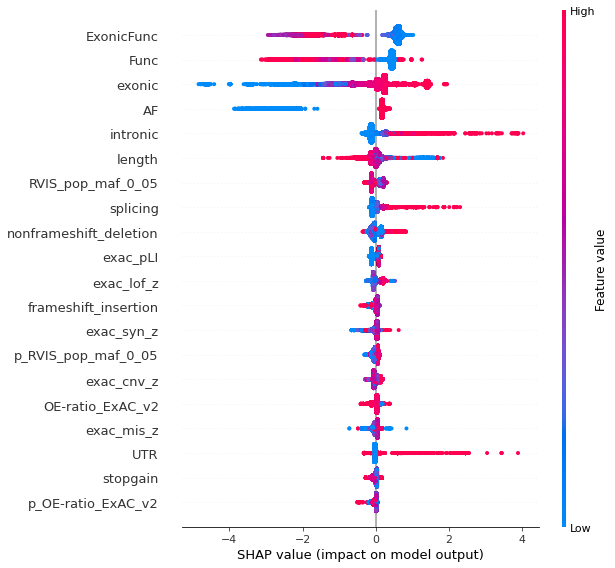

In [72]:
clf=GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=max_leaf_nodes,                        
            )
import shap
clf.fit(x_train,y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)
#shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train)

In [73]:
shap_df=pd.DataFrame()
shap_df['feature']=x_train.columns.to_list()
shap_df['importance']=np.mean(np.abs(shap_values),axis=0)
shap_df=shap_df.sort_values(by=['importance'],ascending=False)

In [74]:
shap_df

,feature,importance
1,ExonicFunc,0.866195
0,Func,0.657603
3,exonic,0.587579
28,AF,0.398710
6,intronic,0.205513
2,length,0.129690
22,RVIS_pop_maf_0_05,0.111635
8,splicing,0.103678
12,nonframeshift_deletion,0.101060
20,exac_pLI,0.088032


In [75]:
##
for num in range(28):
    num_sel=shap_df.iloc[:num+1,0].to_list()
    x_train_num=x_train[num_sel]
    x_test1_num=x_test1[num_sel]
    x_test2_num=x_test2[num_sel]
    out=test_test2_auc(clf,x_train_num, y_train,x_test1_num,y_test1,x_test2_num,y_test2)
    print(num+1,out)

1 (0.9453481362390315, 0.9752630587288635, 0.9404777563462364)
2 (0.9555102503817133, 0.9939778605104492, 0.9497996058235335)
3 (0.9895859253534385, 0.9689660059386191, 0.07515527363109291)
4 (0.9937060777752025, 0.9836394612176436, 0.19538973898668793)
5 (0.9946981060456309, 0.9909769595176571, 0.8064038966441213)
6 (0.9954380187754632, 0.992337248968675, 0.8355515839871623)
7 (0.9958471606704924, 0.9949191911464708, 0.8664679362271238)
8 (0.995859796162893, 0.9944561970170904, 0.8754145494146308)
9 (0.9960893021823227, 0.9944621526361123, 0.8981792415426577)
10 (0.996088397801476, 0.9960254006301283, 0.9213546809571099)
11 (0.9960426361306349, 0.9954081157350742, 0.9042504328847741)
12 (0.996203150811191, 0.9960351783852396, 0.9228572849598495)
13 (0.9960560209671655, 0.9958903253773971, 0.9230061698411549)
14 (0.9959615777673214, 0.995808604197833, 0.9131151021354396)
15 (0.9959232061799702, 0.9959073054082235, 0.9176276557938915)
16 (0.9961745465369836, 0.9962143711183643, 0.932718

In [76]:
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9964223985678742, 0.9967655832086677, 0.9624719670115025)

In [77]:
#x_test1[test1_star>=2]
test_test2_auc(clf,x_train, y_train,
               x_test1[test1_star>=2],y_test1[test1_star>=2],
               x_test2[test2_lab.astype('int')>=2],y_test2[test2_lab.astype('int')>=2])

(0.9964223985678742, 0.9978816087838644, 0.9782391185383026)